In [4]:
! pip install -e .
#! python -m pip show tex2net


Obtaining file:///Users/joaocosta/Documents/GitHub/tex2net
  Preparing metadata (setup.py) ... done
  Attempting uninstall: character-interaction-graph
    Found existing installation: character-interaction-graph 0.1.0
    Uninstalling character-interaction-graph-0.1.0:
      Successfully uninstalled character-interaction-graph-0.1.0
  Running setup.py develop for character-interaction-graph

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [5]:
# Import library functions
from tex2net import (
    create_character_graph, join_similar_nodes,
    rewrite_with_t5_base, rewrite_with_t5, summarize_t5,
    plot_character_centralities, detect_communities_and_plot,
    plot_community_interactions, describe_degree,
    analyze_temporal_relationships, analyze_graph_characteristics,
    detect_communities, calculate_degree_centrality,
    visualize_graph, visualize_pyvis_graph
)
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# Sample narrative text
text = """
Winston dislikes Big Brother.
Winston works for O'Brien.
O'Brien deceives Winston.
Winston loves Julia.
Julia opposes the Party secretly.
Winston writes in a diary.
Parsons asks Winston for help with tasks.
Charrington sells Winston a diary.
Charrington arrests Winston. 
Charrington arrests Julia.
The Thought Police capture Winston.
O'Brien tortures Winston.
Winston betrays Julia under torture.
"""

# ------------------------------
# Step 1: Text Rewriting & Summarization
# ------------------------------

# Option 1: Rewrite text using T5-base (clear subject-verb-object)
rewritten_text = rewrite_with_t5_base(text)
print("Rewritten Text (T5-base):")
print(rewritten_text)

# Option 2: Use FLAN-T5 pipeline (alternative rewriter)
rewritten_text_alternative = rewrite_with_t5(text)
print("\nRewritten Text (FLAN-T5):")
print(rewritten_text_alternative)

# Option 3: Summarize text using T5-small
summary_text = summarize_t5(text)
print("\nSummarized Text (T5-small):")
print(summary_text)

/Users/joaocosta/opt/anaconda3/envs/flask/lib/python3.8/site-packages/transformers/models/t5/tokenization_t5.py:220: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior wi

Rewritten Text (T5-base):
True

Rewritten Text (FLAN-T5):
Winston dislikes Big Brother.

Summarized Text (T5-small):
in character - verb - character form: Winston dislikes Big Brother. Winston works for O'Brien. Winston loves Julia. Julia opposes the Party secretly. Winston writes in a diary. Parsons asks Winston for help with tasks. Charrington sells Winston a diary. Charrington arrests Julia.


In [7]:
# ------------------------------
# Step 2: Create the Character Graph
# ------------------------------

# Use the summary (or rewritten version) to create the graph.
graph, characters, relationships = create_character_graph(summary_text)
print("\nExtracted Characters:", characters)
print("Relationships:", relationships)

# Merge nodes with similar names for consistency.
graph = join_similar_nodes(graph, characters)




Extracted Characters: ['Winston', "O'Brien", 'Julia', 'Parsons', 'Charrington']
Relationships: [['Winston', "O'Brien"], ['Winston', 'Julia'], ['Parsons', 'Winston'], ['Charrington', 'Winston'], ['Charrington', 'Julia']]


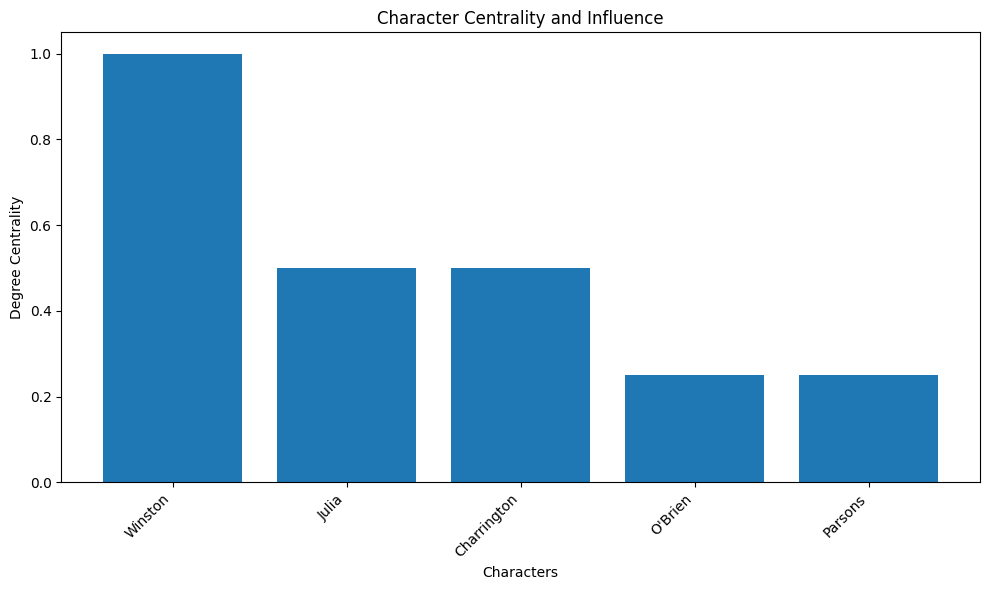

character_network_communities.html


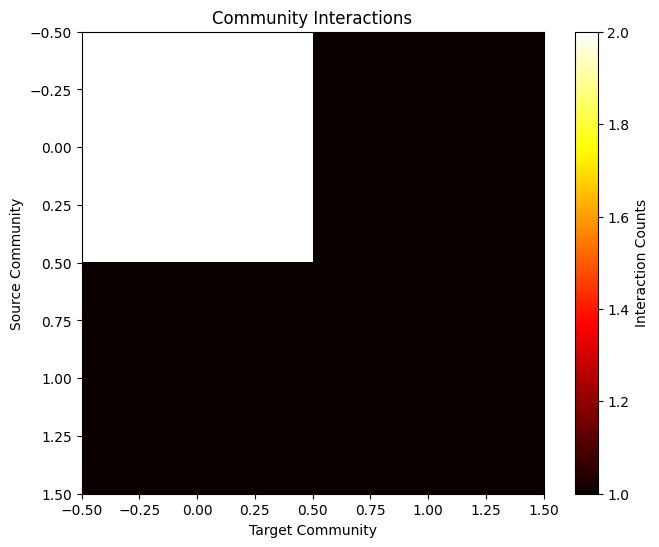

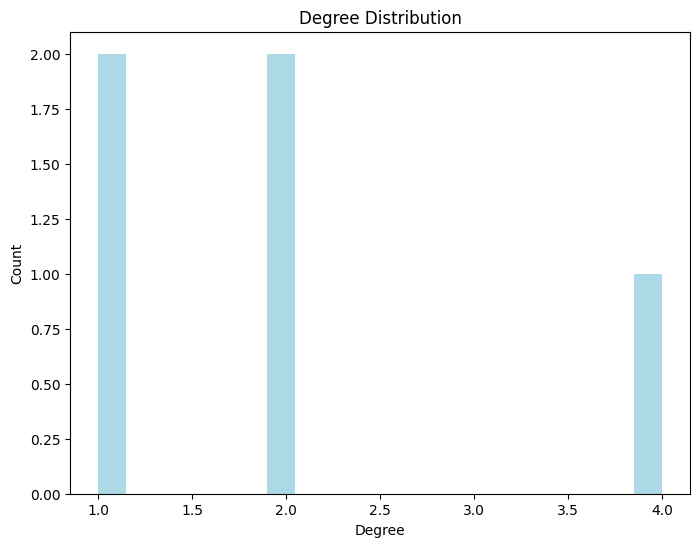

Temporal Relationship Analysis
-----------------------------
Average Temporal Distance: None
Density of Temporal Interactions: 0.25
Reciprocity of the Graph: 0.0

Graph Characteristics:
Number of Nodes: 5
Number of Edges: 5
Average Degree: 2.0
Average Clustering Coefficient: 0.2166666666666667

Detected Communities: {1: ['Winston', "O'Brien", 'Parsons'], 0: ['Julia', 'Charrington']}
Degree Centrality: {'Winston': 1.0, "O'Brien": 0.25, 'Julia': 0.5, 'Parsons': 0.25, 'Charrington': 0.5}


In [8]:
# ------------------------------
# Step 3: Network Analysis
# ------------------------------

# 3.1 Plot Character Centralities (Degree Centrality)
plot_character_centralities(graph)

# 3.2 Detect Communities and Visualize Them
partition = detect_communities_and_plot(graph)

# 3.3 Plot Community Interactions (Heatmap)
plot_community_interactions(graph, partition)

# 3.4 Describe Degree Distribution of the Graph
describe_degree(graph)

# 3.5 Analyze Temporal Relationships
analyze_temporal_relationships(graph)

# 3.6 Print Overall Graph Characteristics
analyze_graph_characteristics(graph)

# 3.7 Detect Communities (returning a dictionary)
communities = detect_communities(graph)
print("\nDetected Communities:", communities)

# 3.8 Calculate and Print Degree Centrality Values
degree_centrality = calculate_degree_centrality(graph)
print("Degree Centrality:", degree_centrality)

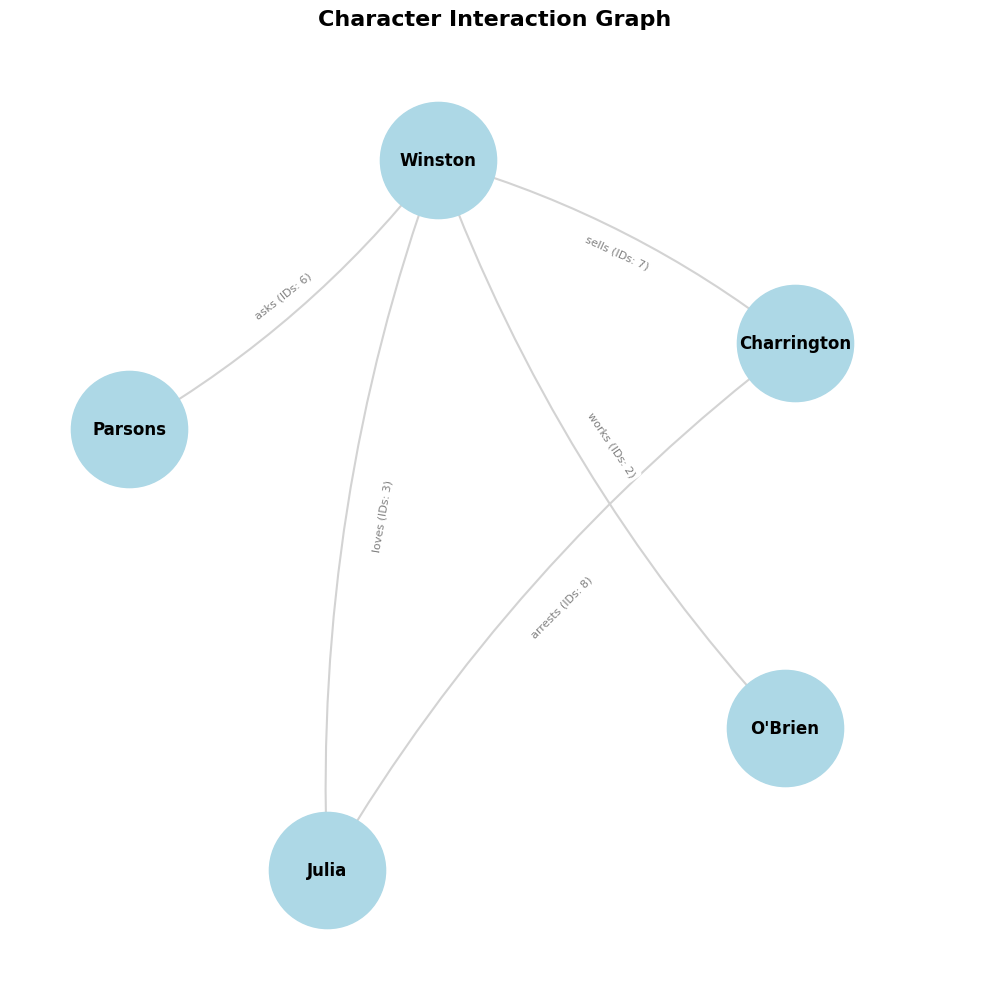

character_relationships.html


In [9]:
# ------------------------------
# Step 4: Visualization
# ------------------------------

# 4.1 Visualize the Graph using Matplotlib (Static Visualization)
visualize_graph(graph, title="Character Interaction Graph")

# 4.2 Visualize the Graph using Pyvis (Interactive HTML Visualization)
visualize_pyvis_graph(graph, output_file="character_relationships.html")



In [10]:
# ------------------------------
# Optional: Further Custom Analysis
# ------------------------------

# Example: Compute and print additional NetworkX metrics
print("\nAdditional NetworkX Metrics:")
print("Average Clustering Coefficient:", nx.average_clustering(graph))
print("Graph Density:", nx.density(graph))


Additional NetworkX Metrics:
Average Clustering Coefficient: 0.2166666666666667
Graph Density: 0.25
